In [1]:
import pandas as pd
fish = pd.read_csv('midterm.csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

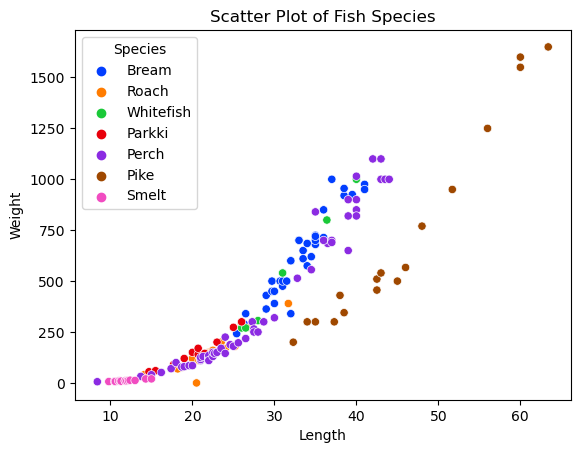

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프 그리기
sns.scatterplot(data=fish, x='Length', y='Weight', hue='Species', palette='bright')

# 그래프 제목 추가
plt.title('Scatter Plot of Fish Species')

# x축, y축 레이블 추가
plt.xlabel('Length')
plt.ylabel('Weight')

# 그래프 출력
plt.show()



/var/folders/8t/_x4yrtt90836wy7q0wr7sbkr0000gn/T/ipykernel_1576/1988541395.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(fish.corr(), annot=True, cmap='coolwarm')


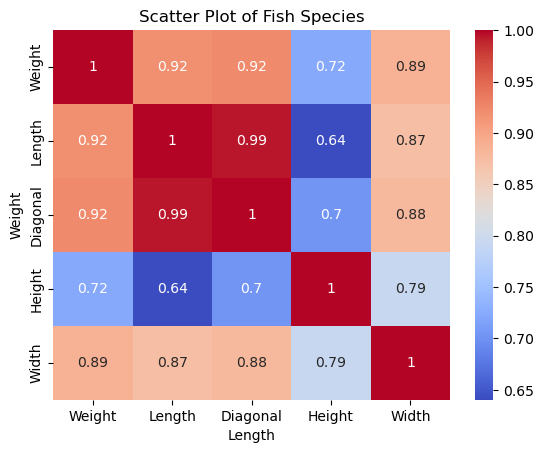

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(fish.corr(), annot=True, cmap='coolwarm')

# 그래프 제목 추가
plt.title('Scatter Plot of Fish Species')

# x축, y축 레이블 추가
plt.xlabel('Length')
plt.ylabel('Weight')

# 그래프 출력
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(
fish_input,fish_target,random_state=42)


In [7]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [8]:
from sklearn.linear_model import LogisticRegression
#'Bream' 'Roach
Bream_Roach_indexes = (train_target=='Bream')|(train_target=='Roach')
train_Bream_Roach = train_scaled[Bream_Roach_indexes]
target_Bream_Roach = train_target[Bream_Roach_indexes]

lr = LogisticRegression()
lr.fit(train_Bream_Roach,target_Bream_Roach)

LogisticRegression()

In [9]:
print(lr.classes_)
print(lr.predict_proba(train_Bream_Roach[:5]))

['Bream' 'Roach']
[[0.99147592 0.00852408]
 [0.01667463 0.98332537]
 [0.98198018 0.01801982]
 [0.94494806 0.05505194]
 [0.99247108 0.00752892]]


In [10]:
print(lr.coef_,lr.intercept_)

[[-0.59065741 -0.36852835 -0.61523891 -2.08924701 -0.18971122]] [0.56912639]


In [11]:
#메서드는 로지스틱 회귀 모델의 결정 함수를 계산하여 반환합니다.
#즉 값이 음수면 0으로 양수면 1로 예측함
decisions = lr.decision_function(train_Bream_Roach[:5])
print(decisions)

[-4.75629992  4.07705167 -3.9980986  -2.84285293 -4.88144672]


In [12]:
#시그모이드 함수 계산 
from scipy.special import expit
print(expit(decisions))

[0.00852408 0.98332537 0.01801982 0.05505194 0.00752892]


In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=20,max_iter=1000)
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.9327731092436975
0.925


In [14]:
fish_input = fish[['Weight','Length','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

train_input,test_input,train_target,test_target = train_test_split(
fish_input,fish_target)

ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

lr = LogisticRegression(C=30,max_iter=1000)
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.8907563025210085
0.825


In [15]:
fish_input = fish[['Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

train_input,test_input,train_target,test_target = train_test_split(
fish_input,fish_target,random_state=42)

ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

lr = LogisticRegression(C=30,max_iter=1000)
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.9327731092436975
0.925


In [16]:
fish_input = fish[['Weight','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

train_input,test_input,train_target,test_target = train_test_split(
fish_input,fish_target)

ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

lr = LogisticRegression(C=40,max_iter=1000)
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.8739495798319328
0.9


In [17]:
fish_input = fish[['Weight','Length','Diagonal','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()
train_input,test_input,train_target,test_target = train_test_split(
fish_input,fish_target)

ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

lr = LogisticRegression(C=60,max_iter=1000)
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.9243697478991597
0.875


In [18]:
fish_input = fish[['Weight','Length','Diagonal','Height']].to_numpy()
fish_target = fish['Species'].to_numpy()
train_input,test_input,train_target,test_target = train_test_split(
fish_input,fish_target,random_state=42)

ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

lr = LogisticRegression(C=20,max_iter=1000)
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.9495798319327731
0.925


In [20]:
import numpy as np
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision,decimals=2))

[[ -6.78   1.6    4.95  -3.95   3.24   1.44  -0.49]
 [-12.4    1.33   6.23  -4.85   3.87   7.55  -1.74]
 [ -5.77  -8.87   4.98   6.46   3.58   0.6   -0.98]
 [ -0.65   0.69   3.21  -2.06   3.38  -6.19   1.64]
 [ -6.85  -2.02   5.3   -0.48   3.35   1.19  -0.5 ]]


In [21]:
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(lr.classes_)
print(np.round(proba,decimals=2))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.   0.03 0.8  0.   0.14 0.02 0.  ]
 [0.   0.   0.21 0.   0.02 0.77 0.  ]
 [0.   0.   0.18 0.78 0.04 0.   0.  ]
 [0.01 0.03 0.4  0.   0.47 0.   0.08]
 [0.   0.   0.86 0.   0.12 0.01 0.  ]]


In [22]:
# fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']]

fish_input = []

fish_input.append(fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy())
fish_input.append(fish[['Weight', 'Diagonal', 'Height', 'Width']].to_numpy())
fish_input.append(fish[['Weight', 'Length', 'Height', 'Width']].to_numpy())
fish_input.append(fish[['Weight', 'Length', 'Diagonal', 'Width']].to_numpy())
fish_input.append(fish[['Weight', 'Length', 'Diagonal', 'Height']].to_numpy())

fish_target = fish['Species'].to_numpy()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

train_score = []
test_score = []

for i in range(0, 5):
    train_score_temp = []
    test_score_temp = []
    for v in range(0, 1000):
        train_input, test_input, train_target, test_target = train_test_split(fish_input[i], fish_target)
        ss = StandardScaler()
        ss.fit(train_input)
        train_scaled = ss.transform(train_input)
        test_scaled = ss.transform(test_input)
        
        lr = LogisticRegression(C=30, max_iter=1000)
        lr.fit(train_scaled, train_target)
        # print(lr.score(train_scaled, train_target))
        # print(lr.score(test_scaled, test_target))
        train_score_temp.append(lr.score(train_scaled, train_target))
        test_score_temp.append(lr.score(test_scaled, test_target))
    train_score.append(np.mean(train_score_temp))
    test_score.append(np.mean(test_score_temp))
    
print(train_score)
print(test_score)

[0.9448151260504203, 0.891168067226891, 0.8834117647058827, 0.883260504201681, 0.9487394957983195]
[0.9009000000000001, 0.8445, 0.8347749999999998, 0.8588250000000001, 0.92325]
